In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
boston = pd.read_csv('./data/Boston_house.csv')

In [3]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [4]:
boston_data = boston.drop(['Target'], axis=1)

In [5]:
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


1978 보스턴 주택 가격

506개 타운의 주택 가격 중앙값(단위: $1,000)
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수 
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방 피트를 초과한 거주지역 비율
- CHAS: 찰스강 경계에 위치한 경우 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

In [6]:
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

## 다중선형회귀분석

### crim, rm, lstat 세 개의 변수를 통해 다중회귀적합

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [10]:
x_data1 = sm.add_constant(x_data, has_constant="add")

In [11]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [12]:
print(fitted_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.01e-112
Time:                        19:11:03   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.4

### 단순선형회귀모델의 회귀계수와 비교

In [13]:
crim1 = sm.add_constant(crim, has_constant='add')
rm1 = sm.add_constant(rm, has_constant='add')
lstat1 = sm.add_constant(lstat, has_constant='add')

model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(target, lstat1)
fitted_model3 = model3.fit()

In [14]:
# 단순선형회귀모델

print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [15]:
# 다중선형회귀모델

print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


### 행렬 연산을 통해 beta 구하기

In [16]:
from numpy import linalg

In [20]:
# ((X'X)^-1)X'y

ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [21]:
# y_hat
pred4 = fitted_multi_model.predict(x_data1)

#### redisual plot

In [23]:
import matplotlib.pyplot as plt

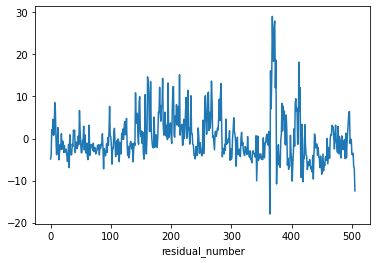

In [24]:
fitted_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

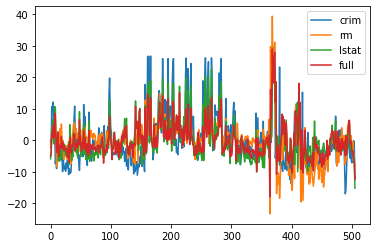

In [26]:
# 잔차 비교
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full")
plt.legend()
plt.show()